In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv('weather.csv')
data

,Outlook,Temp,Wind,Humidity,Play
0,R,H,F,Normal,N
1,R,H,T,High,N
2,O,H,F,Normal,Y
3,S,M,F,Normal,N
4,S,M,F,Normal,Y
5,S,M,T,Low,Y
6,O,C,T,Normal,Y
7,R,C,F,Normal,Y
8,R,C,F,Low,Y
9,S,M,F,High,Y


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Temp      14 non-null     object
 2   Wind      14 non-null     object
 3   Humidity  14 non-null     object
 4   Play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [53]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [54]:
le = LabelEncoder()
df_encoded = pd.DataFrame()

In [55]:
# Converting string labels into numbers.
outlook_encoded = le.fit_transform(data['Outlook'])
temp_encoded = le.fit_transform(data['Temp'])
wind_encoded = le.fit_transform(data['Wind'])
humidity_encoded = le.fit_transform(data['Humidity'])
play_encoded = le.fit_transform(data['Play'])
print("outlook_encoded: ",outlook_encoded)
print("temp_encoded: ",temp_encoded)
print("wind_encoded: ",wind_encoded)
print("humidity_encoded: ",humidity_encoded)
print("play_encoded: ",play_encoded)


outlook_encoded:  [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
temp_encoded:  [1 1 1 2 2 2 0 0 0 2 2 2 1 2]
wind_encoded:  [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
humidity_encoded:  [2 0 2 2 2 1 2 2 1 0 0 1 2 2]
play_encoded:  [0 0 1 0 1 1 1 1 1 1 1 1 1 0]


In [56]:
df = pd.DataFrame()
df["Outlook"] = outlook_encoded
df["Temperature"] = temp_encoded
df["Humidity"] = humidity_encoded
df["Wind"] = wind_encoded
df["Play"] = play_encoded

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(["Play"],axis=1),df["Play"],test_size = 0.2,random_state = 35)

#Creating Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=35)

In [58]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=35)

In [59]:
DT.score(X_test,y_test)*100

66.66666666666666

In [60]:
pred_val_1 =[[1,2,1,0]]
pred_val_2 =[[2,0,0,1]]

In [61]:
DT.predict(pred_val_1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [62]:
DT.predict(pred_val_2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

#Tree Visualization

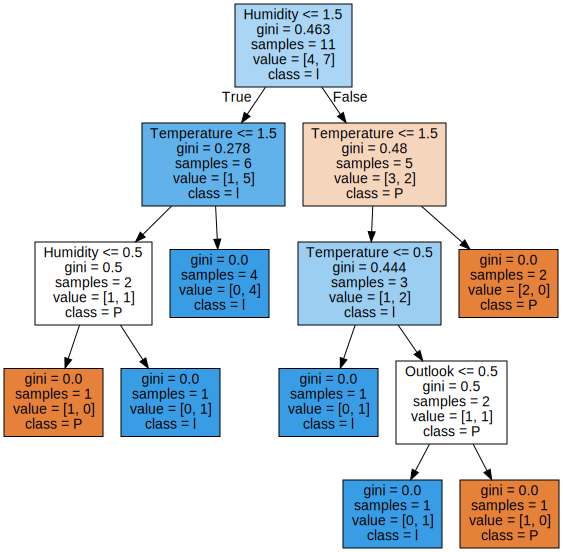

In [65]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(DT, out_file=None, 
                                feature_names=["Outlook","Temperature","Humidity","Wind"],  
                                class_names="Play",
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph